In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import style
import matplotlib.pylab as plt
import numpy as np
import IPython
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import seaborn as sns
style.use('ggplot')
RSEED = 12

## Welcome!
The following Notebook contains data analysis of the Israeli elections, while examining voting patterns from different angles in Israel's population. After ***each*** graph/table we've written chosen conclusions that could be inferred from the analyzed data - some conclusions were more suprising than others. <br> Although this Notebook contains Hebrew words, we treated this exercise as if it was supposed to be released on Kaggle, thus we did our best to also allow English readers to step in and follow our leads.

## Question 2 - Analyzing the data

### setting up global variable names
We have decided that the best approach in handling the Hebrew datasets is to be minimally invasive, meaning we'll not modify / translate the files into English. The decision was made after realizing that Python handles Hebrew with no problems. The only related issue was the typing of hebrew characters in the Notebook, which causes the text cursor to behave unexpectadly. Therefore, we've translated only specific words into Global variables, which are used throught this Notebook.

In [2]:
LOCATION = 'שם ישוב'
ELIGIBLE_VOTERS = 'בזב'
ACTUAL_VOTERS = 'מצביעים'
VALID_VOTES = 'כשרים'
SPOILED_VOTES = 'פסולים'
BALLOTS = 'קלפי'
LOCATION_SYMBOL = 'סמל ישוב'
COMMITTEE_SYMBOL = 'סמל ועדה'
RELIGION = 'דת יישוב'
JEWISH = 'יהודי'
NON_JEWISH = 'לא יהודי'
BEDOUIN = 'שבט בדווי'
MIXED = 'ישוב מעורב'
NULL = 'ריק'
OLD = 'ותיק'
FOUNDED = 'שנת ייסוד'
LIKUD = 'מחל'
JOINT_LIST = 'ודעם'
BLUE_WHITE = 'פה'
ISRAEL_BEITEINU = "ל"
MERETZ = "מרצ"
YAMINA = "טב"
YAADOT_HATORAH = "ג"
SHAS = "שס"
HAAVODA = "אמת"
POPULATION_SIZE = 'סך הכל אוכלוסייה 2018'
FIRST_PARTY_INDEX=7


## Analysis of the 22nd election - ballots - dataset

### Loading and verifiying "votes_22_ballots" data 

In [3]:
df_ballots_22 = pd.read_csv("data\\votes_22_ballots.csv", header=0, encoding = "ISO-8859-8")
# the following columns contain no contribution to our research
dropped_cols = ['ברזל', 'שופט', 'ריכוז','סמל ועדה' ]
df_ballots_22.drop(columns=dropped_cols, inplace=True)
df_ballots_22

,שם ישוב,סמל ישוב,קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
0,אבו ג'ווייעד (שבט),967,1.0,559,113,2,111,0,1,100,...,9,0,0,0,0,1,0,0,0,0
1,אבו ג'ווייעד (שבט),967,2.0,751,224,1,223,3,0,202,...,12,0,0,0,0,1,1,0,0,0
2,אבו ג'ווייעד (שבט),967,3.0,651,205,6,199,0,0,196,...,1,0,0,0,0,1,0,0,0,0
3,אבו גוש,472,1.0,525,268,3,265,8,0,194,...,25,0,1,0,0,0,0,0,0,5
4,אבו גוש,472,2.0,686,363,6,357,5,0,290,...,33,0,0,0,0,2,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,תקוע,3563,2.0,658,460,2,458,13,14,1,...,19,1,1,0,0,0,0,0,0,11
10897,תקוע,3563,3.0,700,543,4,539,9,3,0,...,25,1,1,0,0,0,0,0,0,12
10898,תראבין א-צאנע (שבט),970,1.0,511,33,0,33,0,0,25,...,6,0,0,0,0,0,0,0,0,0
10899,תראבין א-צאנע(ישוב),1346,1.0,574,210,5,205,5,1,115,...,8,0,0,0,0,0,0,0,1,2


Note - Each row contains information about a specific location (city/town/village...).<br> The features are as follows: Location name (שם ישוב), Location symbol (סמל ישוב), Ballot number (קלפי), Eligble voters (בזב - בעלי זכות בחירה), Actual voters (מצביעים), Spoiled Votes (פסולים), Valid Votes (כשרים). The rest of the features depict the party's name, and the columns contain the amount of votes each party has received in each location.

### Checking null values

In [4]:
df_ballots_22.isnull().sum()

שם ישוב     0
סמל ישוב    0
קלפי        0
בזב         0
מצביעים     0
פסולים      0
כשרים       0
אמת         0
ג           0
ודעם        0
ז           0
זכ          0
זן          0
זץ          0
טב          0
י           0
יז          0
ינ          0
יף          0
יק          0
כ           0
כי          0
כף          0
ל           0
מחל         0
מרצ         0
נ           0
נך          0
נץ          0
פה          0
ףז          0
צ           0
צן          0
ץ           0
ק           0
קך          0
קץ          0
רק          0
שס          0
dtype: int64

In [5]:
df_ballots_22.describe()

,סמל ישוב,קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
count,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,...,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000
mean,4531.780938,125.215650,586.296487,409.610861,2.601780,407.009082,19.519494,24.655995,43.134667,0.109440,...,105.606275,0.113384,0.280066,0.066508,0.054307,0.135125,0.085130,0.091184,0.219705,30.290707
std,3183.323038,195.354436,153.218193,132.022112,7.004732,131.442141,16.799932,74.352325,113.479828,0.457801,...,89.203672,0.375372,0.826286,0.599142,0.250843,0.402966,0.327207,0.334193,0.802679,43.421309
min,7.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1200.000000,8.000000,544.000000,334.000000,1.000000,332.000000,6.000000,1.000000,0.000000,0.000000,...,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,4000.000000,41.000000,616.000000,404.000000,2.000000,402.000000,16.000000,3.000000,1.000000,0.000000,...,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
75%,7400.000000,159.000000,680.000000,470.000000,3.000000,468.000000,29.000000,8.000000,4.000000,0.000000,...,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
max,9999.000000,994.000000,816.000000,1055.000000,489.000000,1049.000000,228.000000,709.000000,561.000000,31.000000,...,432.000000,5.000000,15.000000,53.000000,4.000000,4.000000,5.000000,5.000000,20.000000,482.000000


### First, Lets check some basic statistics...

In [6]:
count_locations = df_ballots_22[LOCATION].nunique()
count_ballots = df_ballots_22[BALLOTS].count()
sum_actual_voters = int(df_ballots_22[ACTUAL_VOTERS].sum())
sum_valid_votes = df_ballots_22[VALID_VOTES].sum()
sum_spoiled_votes = df_ballots_22[SPOILED_VOTES].sum()
sum_eligible_voters = int(df_ballots_22[ELIGIBLE_VOTERS].sum())
non_voters = sum_eligible_voters-sum_actual_voters
total_parties = df_ballots_22.columns.array[FIRST_PARTY_INDEX:].shape[0]

pd.DataFrame({"Locations":[f"{count_locations:,}"] , "Ballots":[f"{count_ballots:,}"], 
              "Actual Voters":[f"{sum_actual_voters:,}"], "Valid Votes":[f"{sum_valid_votes:,}"],
              "Spoiled Votes":[f"{sum_spoiled_votes:,}"], "Eligible Voters": [f"{sum_eligible_voters:,}"],
             "Non Voters":[f"{non_voters:,}"], "Total Parties": total_parties}, index=["Statistics"]).T



,Statistics
Locations,"1,214"
Ballots,"10,901"
Actual Voters,"4,465,168"
Valid Votes,"4,436,806"
Spoiled Votes,"28,362"
Eligible Voters,"6,391,218"
Non Voters,"1,926,050"
Total Parties,32


***Conclusions***: No special conclusions exist here. The purpose of this table is to give a general insight to the scope of the 22nd elections.

### Major parties analysis
In this section we'll analyze the distribution of votes amongst the top parties who got a least 3.25% votes (3.25% was the voting threshold for the 22nd elections, [as seen here](https://m.knesset.gov.il/about/lexicon/pages/qualifying-threshold.aspx) ). These are the parties who were supposed to enter the 22nd Knesset (which eventually wasn't formed).

In [7]:
party_labels = list(df_ballots_22.columns.array[FIRST_PARTY_INDEX:])
party_votes = df_ballots_22[party_labels].sum().sort_values(ascending=False) # list of total votes per party
party_votes_percent = party_votes / sum_valid_votes # voting perecntage per party
voting_threshold = 0.0325
major_parties = party_votes_percent[party_votes_percent>=voting_threshold]
major_parties = round(major_parties,4)
minor_parties = party_votes_percent[party_votes_percent<voting_threshold]

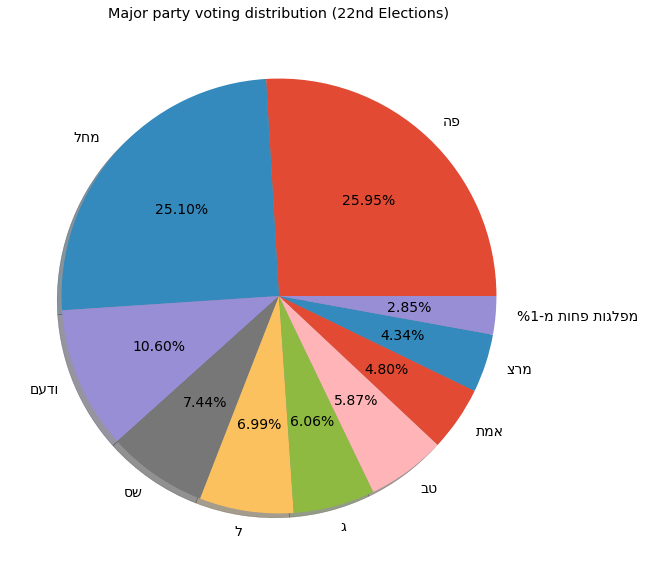

In [8]:
others = pd.Series([1-major_parties.sum()], index = ["מפלגות פחות מ-1%"]) # parties which didn't pass the voting threshold
major_parties = major_parties.append(others)
labels = [name[::-1] for name in major_parties.index]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Major party voting distribution (22nd Elections)");
patches, texts, autotexts = ax.pie(major_parties,shadow=True, labels=labels,  autopct='%.2f%%');
[text.set_fontsize(14) for text in texts] # increase label font size
[num.set_fontsize(14) for num in autotexts];

***Conclusion:*** According the 22nd Israeli elections, The "Blue White" party (פה) is the biggest party in Israel (~26% of votes), followed by The "Likud" party (מחל) which holds ~25% of votes.<br>


### 22nd Elections Bloc Map
The Israeli politics traditionally fall into two blocs: left-wing and right-wing. The following pie chart demonstrates the distibution of mandates in the 22nd elections, together with the mandates each party has recieved within each bloc. 

Note: 1 mandate in the 22nd elections was worth 35,917 votes (according to [this site](https://www.davar1.co.il/211124/)).

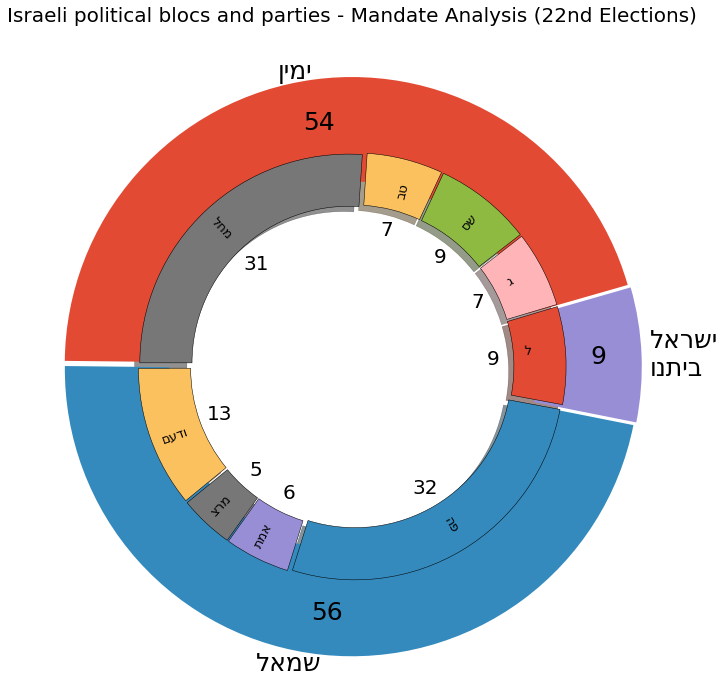

In [9]:
def absolute_value(val):#turns the percent on the pie chart into the actual values
    a  = np.round(val/100.*sum(blocs), 0)
    return int(a)
single_mandate = 35917
major_party_labels = major_parties[:-1].index
mandates_per_party = round(party_votes / single_mandate).astype(int)[major_party_labels]

# Main political blocs (right, left_center, left)
right_wing = mandates_per_party[[LIKUD, SHAS, YAADOT_HATORAH, YAMINA]]
left_center = mandates_per_party[[BLUE_WHITE, HAAVODA, MERETZ, JOINT_LIST]]
israel_beiteinu = mandates_per_party[ISRAEL_BEITEINU]
blocs = [right_wing.sum(), left_center.sum(), israel_beiteinu]
labels = ['ימין','שמאל','ביתנו\nישראל']
labels_blocs = [name[::-1] for name in labels]

# reordering the inner parties to accomodate the order of outer pie chart 
parties_reordered = mandates_per_party[[LIKUD,YAMINA,SHAS,
                                        YAADOT_HATORAH, ISRAEL_BEITEINU, BLUE_WHITE,
                                        HAAVODA, MERETZ, JOINT_LIST]]
labels_reordered = [label[::-1] for label in parties_reordered.index]

# Drawing the pie chart
fig, ax = plt.subplots(figsize=(12,12))
_, texts1, autotexts1 = ax.pie(blocs, labels=labels_blocs, pctdistance=0.85, labeldistance = 1.03,
                                   radius=1.1, wedgeprops ={"width":0.4},
                                   explode = (0.01,0.01,0.01), autopct=absolute_value,startangle=16)
_, texts2, autotexts2 = ax.pie(parties_reordered, labeldistance=.8, pctdistance = 0.65,
                                   rotatelabels=50 ,counterclock=False, labels=labels_reordered,
                                   radius=0.8,wedgeprops ={"width":0.2,"edgecolor":'black'},
                                   autopct=absolute_value,startangle=180, shadow=True,
                            explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02))
# texts1[2].set_rotation(100)
[num.set_fontsize(25) for num in autotexts1]
[text.set_fontsize(25) for text in texts1]; # increase label font size
[num.set_fontsize(20) for num in autotexts2]
[text.set_fontsize(13) for text in texts2]; # increase label font size
ax.set_title("Israeli political blocs and parties - Mandate Analysis (22nd Elections)",fontsize=20, y=1.02,);


***Notes:***
1. The outer chart shows the mandate division between the camps. The inner chart shows the parties within the blocs and the mandates they've received.<br><br>

2. As we've said before israeli politics is divided into two camps: right(ימין) and left(שמאל). In the 22nd elections, due to the uncertainty regarding which camp Israel Beiteinu(ישראל ביתנו) would join after the end of the elections, it was accepted, at least in official polls, to seprate this party from the rest of the 2 blocs, as a bloc of its own.<br><br>

3. ***Anomaly Detected***: If we look closely at the sum of all outer blocks, we'll reach 119. The Israeli parliamant (The Knesset) is comprised of 120 members.<br> The reason for this contradiction is that although the chart demonstrates the final results of the votings, plain and simply - They are not the final results!<br> After the elections are over, the mandates (i.e Knesset setas) are distrubted via the [Bader-Offer method and surplus vote agreements](https://www.knesset.gov.il/lexicon/eng/seats_eng.htm) between parties. The bottom line is that the actual outcome of the results is not the same as the graph we present, albeit the final results and the results in the graph are extremly close.<br><br>

***Main Conclusion***: 
The graph shows that Israel's population is almost equally divided between the camps. This equalibrium has caused the country to go on an election spree - three consequtive times, and almost a forth time, which was prevented by the formation of the 35th national unity government.

### Valid votes vs Spoiled votes
Here we examine the ratio between valid & spoiled votes, and look for how many votes were disqualified.

[None, None]

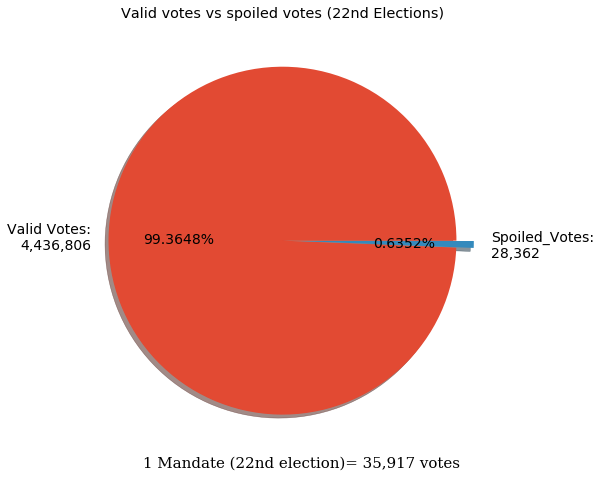

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Valid votes vs spoiled votes (22nd Elections)")
ax.text(-0.8,-1.3,"1 Mandate (22nd election)= 35,917 votes",family = "serif",size=15)
patches, texts, autotexts = ax.pie([sum_valid_votes, sum_spoiled_votes],shadow=True, explode = (0,0.1),
        labels=(f'Valid Votes:\n{sum_valid_votes:,}',f'Spoiled_Votes:\n{sum_spoiled_votes:,}'), autopct='%.4f%%');
[num.set_fontsize(14) for num in autotexts]
[text.set_fontsize(14) for text in texts] # increase label font size

***Conclusion***: After realizing that there were a total of 28,362 spoiled votes - which almost adds up to 1 Mandate (35,917 votes), we made a decision to take a further look at how many votes were actually wasted during the 22nd elections. Not just the spoiled votes, But rather ***all*** the votes who were given to parties which didn't pass the voting threshold.

### Bar chart representing votes per major parties
Plotting a bar chart will help us visualize how many total votes were lost, in comparison to the total votes each major party has recieved

Text(0.5, 1.0, 'Votes per Major Parties')

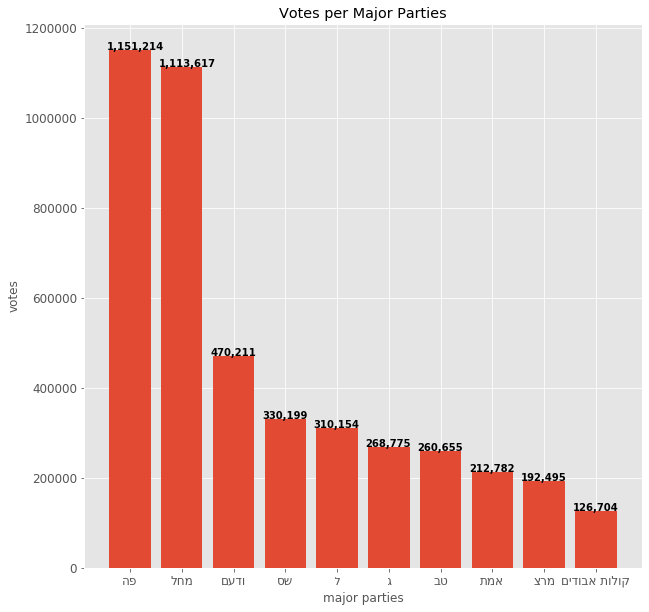

In [11]:
votes_per_party = df_ballots_22.sum(axis=0)[FIRST_PARTY_INDEX:]
major_party_votes = votes_per_party.sort_values()[major_parties.index[0:9]]
lost_votes = int(minor_parties.sum() * sum_valid_votes) 
major_party_votes = major_party_votes.append(pd.Series({"קולות אבודים": lost_votes}))
labels = [name[::-1] for name in major_party_votes.index]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("major parties")
ax.set_ylabel("votes")
ax.bar(x=labels,height=major_party_votes);
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
for index, value in enumerate(major_party_votes[0:]):
    ax.text(x=index - 0.45, y=value, s=f"{value:,}", color='black', fontweight='bold');
ax.set_title("Votes per Major Parties")

***Conclusion:*** The bar chart is pretty self-explanatory, albeit we've noticed the considerable amount of lost eligible votes(קולות אבודים) : 126,704 votes (rightmost column). Coupled with the amount of spoiled votes we previously found (28,362), We've came to the conclusion that there were 155,066 lost votes.<br> As mentioned before, at the 22nd elections, 1 Mandate was worth 35,917 votes - This means that there were  155,066 / 35,917 = *** ~4.3 potential lost mandates.*** Needless to say, those mandates could've easily changed the political landscape and prevent the Aftermath: Another elections... (The 3rd one in one year!)

### Eligible voters vs Number of Ballots
The following part inspects the relationship between the amount of eligible voters in a location, and the number of ballots in that same location.

Text(0, 0.5, 'Number of eligible voters')

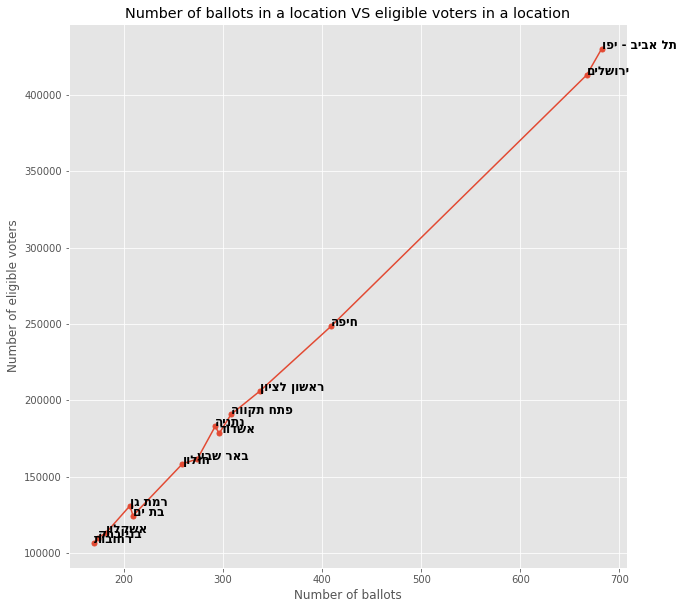

In [12]:
ballot_count = "מספר קלפיות"
df_ballot_count = df_ballots_22.groupby([LOCATION,LOCATION_SYMBOL],as_index = False)[BALLOTS].count()
df_ballot_count = df_ballot_count.nlargest(15, BALLOTS)
df_ballot_count = df_ballot_count.rename(columns={BALLOTS:ballot_count})

df_eligibles_voters = df_ballots_22[[LOCATION, ELIGIBLE_VOTERS]].groupby(LOCATION, as_index=False).sum()
df_ballot_eligibles = pd.merge(df_ballot_count, df_eligibles_voters, on=LOCATION, how="inner")

# removing "מעטפות חיצוניות" - this are votes casted by someone who is unable or unwilling to
# the ballot to which the voter is normally allocated (example: soldiers may vote in any ballot).
envelopes = df_ballot_eligibles.loc[df_ballot_eligibles[LOCATION] == "מעטפות חיצוניות"];
df_ballot_eligibles = df_ballot_eligibles.drop(index= envelopes.index[0])

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(df_ballot_eligibles[ballot_count], df_ballot_eligibles[ELIGIBLE_VOTERS], marker=".", markersize=10)

labels = [name[::-1] for name in df_ballot_eligibles[LOCATION]]
coords= zip(df_ballot_eligibles[ballot_count], 
            df_ballot_eligibles[ELIGIBLE_VOTERS],labels)
for x,y,text in coords:
    ax.text(x, y, s=text, color='black', fontweight='bold', fontsize=12)
ax.set_title("Number of ballots in a location VS eligible voters in a location")
ax.set_xlabel("Number of ballots")
ax.set_ylabel("Number of eligible voters")

***Conclusion***: Upon examination of the graph, we notice that there is indeed a linear correlation between the number of eligible voters and the number of ballots in a location - The higher the 1st, the higher the 2nd - This of course makes total sense.<br> Lets see if the same correlation applies to the size of the ***general population*** in each location with respect to the amount of eligible voters in the same location. For this we will load the demographic data.<br>

## Loading demographic data

### Feature engineering
1. we dropped the following columns since they don't contribute any valuable data to our research - they are meaningless to the topic of election, and don't reflect any patterns between locations:<br>
"שם יישוב,תעתיק,קואורדינטות,מרחב משטרה,שנה,שם יישוב באנגלית"<br><br>
2. Because this dataset contains an extensive amount of nulls (empty data), each column required a specific course of action:
1. Features containing values who reference a lookup table, for example "location's religion", where filled with the most repeated value (the mode of the column).
2. The rest of the features which contain simple numerical values, for example "population size", where filled with the average of the column.<br><br>
3. There was a thought of filling all nulls with 0's - But it seemed to us a lot more wrong, than filling the cells with approximate values, which potentially CAN be correct, and if not, at least they are more logical than 0. For example, filling nulls in a column of population size with the average of the column, makes more sense than filling it with 0 population size - a data which doesn't exist.

In [13]:
# load demographics dataset
df_demographics = pd.read_excel("data\\bycode2018.xlsx", encoding="ISO-8859-8")
#dropping[שם יישוב,תעתיק,קואורדינטות,מרחב משטרה,שנה,שם יישוב באנגלית]. They don't contribute any valuable data
df_demographics = df_demographics.drop(columns = df_demographics.columns[[0,2,16,19,20,21]])

# engineering "founded-year" column
df_demographics[FOUNDED] = df_demographics[FOUNDED].replace({OLD:0})
df_demographics[RELIGION] = df_demographics[RELIGION].fillna(1).astype(np.int)

# fill following columns with their mode
for col in [3,4,5,12,13,15,16]:
    col_name = df_demographics.columns[col]
    mode = df_demographics[col_name].mode()[0]
    df_demographics[col_name] = df_demographics[col_name].fillna(mode).astype(np.int)
# fill following columns with their avg
for col in [7,8,9,10,11,14]:
    col_name = df_demographics.columns[col]
    mean = df_demographics[col_name].mean()
    df_demographics[col_name] = df_demographics[col_name].fillna(mean).astype(np.int)
    
# Replace "location religion" with its real values from the index lookup table
# This will come to use in later scenarios
df_index = pd.read_excel("data\\index_2018.xlsx",sheet_name=4, encoding="ISO-8859-8")
df_demographics

,סמל ישוב,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,יהודים ואחרים,מזה: יהודים,ערבים,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,גובה,ועדת תכנון,אשכול רשויות מקומיות
0,967,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211
1,472,1,11,111,99,444,2,7543,97,79,7446,1948,280,1,598,152,211
2,473,2,24,245,99,143,2,13915,28,11,13887,1948,270,1,19,252,211
3,935,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211
4,958,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,665,6,62,621,39,143,1,699,699,699,3339,1949,310,2,109,651,620
1478,3563,7,76,411,76,445,1,3882,3880,3840,2,1977,190,1,566,714,211
1479,970,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211
1480,1346,6,62,623,69,341,2,1089,6,6,1083,1948,450,1,210,624,610


***Data description:***
1. Location symbol - each location has a unique numerical code.
2. District - 1=Jerusalem, 2=Ha'Tsafon, 3=Haifa, 4=Center, 5=Tel-Aviv, 6=South, 7=Yehuda VeShomron
3. Subdistrict - each number in this columns references a look-up table which in turn has the names of the substricts. We won't detail the names here, because the list is too long and unecessary to know for our research. This piece of information IS necessary for the algorithms we use later on, since it creates a distnction between samples.
4. Zone (אזור טבעי) - Not detailed for reasons in bullet 3.
5. Metropolin - Not detailed for reasons in bullet 3.
6. Total population size 2018.
7. Jewish & others.
8. Number of jewish out of column 7.
9. Number of arabs out of column 7.
10. Settlement form - Not detailed for reasons in bullet 3.
11. Organizational affiliation - Not detailed for reasons in bullet 3.
12. Height of a location
13. Planning Committee - Not detailed for reasons in bullet 3.
14. Local authorities code

### General population vs Number of ballots
Now we can use the demographic data to examine the correlation between the population size, and the number of ballots in the same location.

In [14]:
df_population = df_demographics[[LOCATION_SYMBOL, POPULATION_SIZE]]
df_merged = pd.merge(df_ballot_eligibles, df_population, on=LOCATION_SYMBOL, how="inner")
df_merged = df_merged.sort_values(by=ballot_count, ascending=False).head(10)
df_merged


,שם ישוב,סמל ישוב,מספר קלפיות,בזב,סך הכל אוכלוסייה 2018
0,תל אביב - יפו,5000,682,430203,451523
1,ירושלים,3000,667,413140,919438
2,חיפה,4000,409,248570,283640
3,ראשון לציון,8300,337,206016,251719
4,פתח תקווה,7900,308,190786,244275
5,אשדוד,70,296,178302,224628
6,נתניה,7400,292,182945,217244
7,באר שבע,9000,274,161591,209002
8,חולון,6600,259,158451,194273
9,בת ים,6200,209,124416,128774


***Conclusion***: ANOMALY DETECTED! <br>Tel-Aviv-Yafo has the highest number of ballots in Israel (row 1 column 3).<br> This comes as a suprise, since Jerusalem (row 2) has twice the population size of Tel-Aviv-Yafo (800K citizens vs 400K citizens respectively). Both cities have roughly the same number of ballots due to similar amount of eligible voters, but it looks like half of Jerusalem's population is not eligible to vote.<br><br>  The reason for the discrepancy between Jerusalem's population size and its amount of eligible voters, is explained in the [following article](https://www.maariv.co.il/news/israel/Article-599467) from "Maariv":
![article1](eastjerusalem.JPG)
In short, Due to historical and political reasons, inhabitants of East Jerusalem don't have the right to vote for the Knesset.

### Locations with the highest and lowest turnouts
Voter turnout is the percentage of eligible voters who cast a vote in the ballot during the election (election participation rate). Here we examine the top 10 and the bottom 10 locations in relation to their turnout percentage.

#### Locations with the highest turnouts

In [15]:
df_turnout_22 = df_ballots_22.copy() # making a copy to keep the original dataset intact
df_turnout_22['turnout'] = (df_turnout_22[ACTUAL_VOTERS] / df_turnout_22[ELIGIBLE_VOTERS])
df_turnout_22 = df_turnout_22.groupby(by=[LOCATION, LOCATION_SYMBOL],as_index=False)['turnout'].mean()
columns = [LOCATION, RELIGION, POPULATION_SIZE, 'turnout']
df_ballots_demography = pd.merge(df_turnout_22, df_demographics, on=LOCATION_SYMBOL, how="inner")[columns]
df_ballots_demography[RELIGION] = df_ballots_demography[RELIGION].map({0:NULL, 1:JEWISH,
                                                           2: NON_JEWISH, 3: BEDOUIN, 4:MIXED})
print("Locations with the highest turnout (22nd elections):")
df_ballots_demography.sort_values(by='turnout',ascending=False).head(10)

Locations with the highest turnout (22nd elections):


,שם ישוב,דת יישוב,סך הכל אוכלוסייה 2018,turnout
608,כרמים,יהודי,485,1.094787
1195,תלם,יהודי,432,1.042453
941,עמיחי,יהודי,198,0.957746
475,יסודות,יהודי,913,0.924765
377,זמרת,יהודי,589,0.910082
1071,רחלים,יהודי,790,0.904153
850,נצר חזני,יהודי,460,0.897233
307,גני טל,יהודי,802,0.893976
631,מבוא חורון,יהודי,2650,0.887658
217,ברוכין,יהודי,1093,0.885584


***Conclusion***: The locations with the top 10 turnouts are mostly small jewish towns. The data shows that almost all of the citizens in these locations went out to vote... but wait... ***ANOMALY DETECTED*** - the top 2 towns Kramim & Telem, have an overflowing turnout rate - more than 1!<br>
Lets dive deeper and check them out!

In [16]:
towns = ['כרמים','תלם']
df_ballots_22.loc[df_ballots_22[LOCATION].isin(towns)].iloc[0:,0:6]

,שם ישוב,סמל ישוב,קלפי,בזב,מצביעים,פסולים
5436,כרמים,1198,1.0,211,231,0
10880,תלם,3719,1.0,212,221,1


***Conclusion***: Well... it seems like in both towns there were more people who actually voted than the permitted amount of eligible voters. In both towns roughly 211 were allowed to vote, While in reality ~225 people have cast their votes.<br> Unfortunately, even after searching the web extensively for a possible explanation, We couldn't come up with an answer as to what caused this anaomly to occur.

#### Locations with the lowest turnouts

In [17]:
df_ballots_demography.sort_values(by='turnout',ascending=False).tail(10)

,שם ישוב,דת יישוב,סך הכל אוכלוסייה 2018,turnout
928,עין קנייא,לא יהודי,2063,0.244604
869,סייד (שבט),שבט בדווי,7306,0.229863
57,איבים,יהודי,277,0.224299
100,אסד (שבט),שבט בדווי,7306,0.221311
78,אלוני יצחק,יהודי,302,0.220472
639,מג'דל שמס,לא יהודי,11044,0.201573
1022,קוואעין (שבט),שבט בדווי,7306,0.197895
135,בוקעאתא,לא יהודי,6528,0.148014
1166,שער מנשה,יהודי,590,0.091603
1209,תראבין א-צאנע (שבט),שבט בדווי,7306,0.064579


***Conclusion***: The Bottom 10 turnouts originate mostly from small populated locations, including 3 jewish and 7 non-jewish towns.

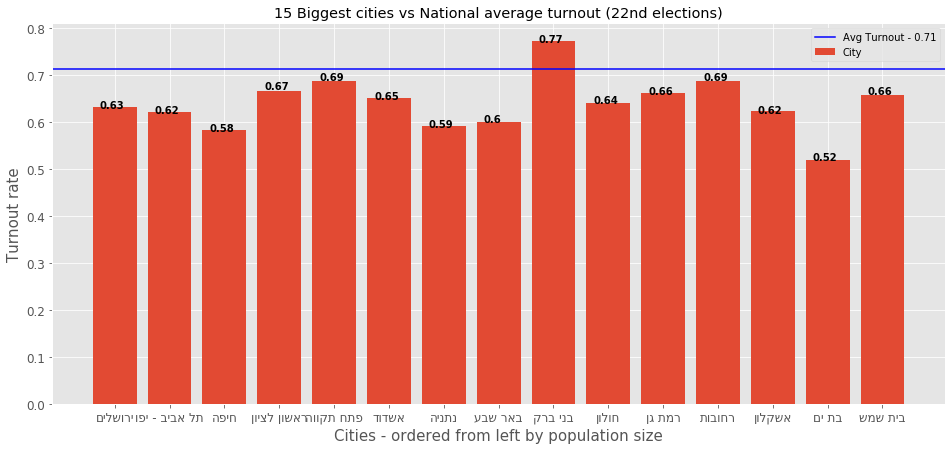

In [18]:
nation_avg_turnout = df_ballots_demography["turnout"].mean()
biggest_cities = df_ballots_demography.sort_values(by=POPULATION_SIZE, ascending=False).head(15)
fig,ax = plt.subplots(figsize=(16,7))
labels = [label[::-1] for label in biggest_cities[LOCATION]]
ax.axhline(nation_avg_turnout,color="blue")
ax.bar(x=labels, height=biggest_cities["turnout"])
ax.legend(labels=["Avg Turnout - 0.71","City"])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
for index, value in enumerate(round(biggest_cities["turnout"],2)):
    ax.text(x=index - 0.27, y=value, s=f"{value:,}", color='black', fontweight='bold');
ax.set_title("15 Biggest cities vs National average turnout (22nd elections)")
ax.set_xlabel("Cities - ordered from left by population size",size = 15)
ax.set_ylabel("Turnout rate", size=15);

***Conclusions:*** The only city out of the 15 biggest cities in israel which surpassed the average turnout of ~0.71 is Bnei Brak(בני ברק). 

## Anomaly Detection - Feature Engineering
In this section we set out to find anomalies in the 22nd elections ballot data. We use the unsupervised "Isolation Forest" Algorithm.<br>
This algoirthm consideres a sample as an outlier (anomaly), when a forest of random trees collectively produce shorter path lengths for that particular sample.

In [19]:
df_anomaly = df_ballots_22.copy()
df_anomaly['percent_turnout'] = df_anomaly[ACTUAL_VOTERS] / df_anomaly[ELIGIBLE_VOTERS]
df_anomaly['percent_spoiled'] = df_anomaly[SPOILED_VOTES] / df_anomaly [ACTUAL_VOTERS]
df_anomaly["total_ballots"] = df_anomaly.groupby(by = [LOCATION])[BALLOTS].transform("size")
df_anomaly["ballots_per_eligibles"] = df_anomaly["total_ballots"] / df_anomaly[ELIGIBLE_VOTERS]
df_anomaly["max_party_votes"] = df_anomaly[party_labels].max(axis=1)
df_anomaly[party_labels] = df_anomaly[party_labels].div(df_anomaly[VALID_VOTES], axis=0) # votings to percent 
df_anomaly.drop(columns=minor_parties.index.array, inplace = True)
df_anomaly.drop(columns=LOCATION_SYMBOL, inplace = True)
df_anomaly.set_index([LOCATION, BALLOTS], inplace=True)
df_anomaly.replace([np.inf, -np.inf], 0 ,inplace = True)
df_anomaly.fillna(0,inplace=True)
df_anomaly.isnull().sum()
df_anomaly

בזב  מצביעים  פסולים  כשרים       אמת         ג  \
שם ישוב             קלפי                                                    
אבו ג'ווייעד (שבט)  1.0   559      113       2    111  0.000000  0.009009   
                    2.0   751      224       1    223  0.013453  0.000000   
                    3.0   651      205       6    199  0.000000  0.000000   
אבו גוש             1.0   525      268       3    265  0.030189  0.000000   
                    2.0   686      363       6    357  0.014006  0.000000   
...                       ...      ...     ...    ...       ...       ...   
תקוע                2.0   658      460       2    458  0.028384  0.030568   
                    3.0   700      543       4    539  0.016698  0.005566   
תראבין א-צאנע (שבט) 1.0   511       33       0     33  0.000000  0.000000   
תראבין א-צאנע(ישוב) 1.0   574      210       5    205  0.024390  0.004878   
תרום                1.0   565      452       0    452  0.037611  0.019912   

                              ודעם        טב         ל       מחל       מרצ  \
שם ישוב             קלפי                                                     
אבו ג'ווייעד (שבט)  1.0   0.900901  0.000000  0.000000  0.000000  0.000000   
                    2.0   0.905830  0.000000  0.000000  0.008969  0.000000   
                    3.0   0.984925  0.000000  0.000000  0.005025  0.000000   
אבו גוש             1.0   0.732075  0.000000  0.003774  0.030189  0.075472   
                    2.0   0.812325  0.000000  0.011204  0.011204  0.019608   
...                            ...       ...       ...       ...       ...   
תקוע                2.0   0.002183  0.384279  0.045852  0.362445  0.004367   
                    3.0   0.000000  0.571429  0.011132  0.246753  0.000000   
תראבין א-צאנע (שבט) 1.0   0.757576  0.000000  0.000000  0.060606  0.000000   
תראבין א-צאנע(ישוב) 1.0   0.560976  0.004878  0.000000  0.307317  0.004878   
תרום                1.0   0.000000  0.188053  0.004425  0.446903  0.008850   

                                פה        שס  percent_turnout  \
שם ישוב             קלפי                                        
אבו ג'ווייעד (שבט)  1.0   0.081081  0.000000         0.202147   
                    2.0   0.053812  0.000000         0.298269   
                    3.0   0.005025  0.000000         0.314900   
אבו גוש             1.0   0.094340  0.018868         0.510476   
                    2.0   0.092437  0.016807         0.529155   
...                            ...       ...              ...   
תקוע                2.0   0.041485  0.024017         0.699088   
                    3.0   0.046382  0.022263         0.775714   
תראבין א-צאנע (שבט) 1.0   0.181818  0.000000         0.064579   
תראבין א-צאנע(ישוב) 1.0   0.039024  0.009756         0.365854   
תרום                1.0   0.077434  0.106195         0.800000   

                          percent_spoiled  total_ballots  \
שם ישוב             קלפי                                   
אבו ג'ווייעד (שבט)  1.0          0.017699              3   
                    2.0          0.004464              3   
                    3.0          0.029268              3   
אבו גוש             1.0          0.011194              8   
                    2.0          0.016529              8   
...                                   ...            ...   
תקוע                2.0          0.004348              3   
                    3.0          0.007366              3   
תראבין א-צאנע (שבט) 1.0          0.000000              1   
תראבין א-צאנע(ישוב) 1.0          0.023810              1   
תרום                1.0          0.000000              1   

                          ballots_per_eligibles  max_party_votes  
שם ישוב             קלפי                                          
אבו ג'ווייעד (שבט)  1.0                0.005367              100  
                    2.0                0.003995              202  
                    3.0                0.004608              196  
אבו גוש             1.0                0.015238

The anomaly detection will be performed on the following features (from the table above): Eligible voters, actual voters, spoiled votes, valid votes, the relative votes of each location to the ***major*** parties, total amount of ballots, number of ballots per elgible voters and the amount of votes which the donimated party in a location has recieved.

### Model - Isolation Forest
The model is built based upon the data on the table above

In [20]:
model = IsolationForest(n_estimators=140,max_samples=600).fit(df_anomaly)
predictions = pd.Series(index=df_anomaly.index, data=model.decision_function(df_anomaly), 
                        name='anomaly_score').sort_values(ascending=False)
df_predictions = predictions.to_frame().tail(15)
df_predictions

C:\Users\AlonT\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\AlonT\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


anomaly_score
שם ישוב         קלפי                
מעטפות חיצוניות 37.0       -0.100725
ירושלים         545.1      -0.100784
                120.0      -0.106518
מעטפות חיצוניות 9.0        -0.107256
ירושלים         62.0       -0.108164
מעטפות חיצוניות 266.0      -0.108847
                88.0       -0.108902
בית זיד         1.0        -0.109677
ירושלים         548.0      -0.111341
מעטפות חיצוניות 91.0       -0.111632
                60.0       -0.122226
שער מנשה        1.0        -0.128498
ירושלים         742.0      -0.133565
                519.1      -0.136385
                994.0      -0.141563

### Choosing three anomalies as examples and analyzing them
The data above shows the outliers (lower means more anomalous). The algorithm tells us that there is an anomaly in these samples, but it doesn't tell us exactly what is the irregularity. For that we'll choose three examples (to be concise) and see what is potentially wrong with them:

In [21]:
anomaly_1 = (df_ballots_22[LOCATION]=="ירושלים") & (df_ballots_22[BALLOTS]==994)
anomaly_2 = (df_ballots_22[LOCATION]=="ירושלים") & (df_ballots_22[BALLOTS]==742)
anomaly_3 = (df_ballots_22[LOCATION]=="שפרעם") & (df_ballots_22[BALLOTS]==34)
df_ballots_22.loc[anomaly_1 | anomaly_2 | anomaly_3]

,שם ישוב,סמל ישוב,קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
4769,ירושלים,3000,742.0,389,38,0,38,2,0,26,...,3,0,0,1,0,1,0,0,0,0
4900,ירושלים,3000,994.0,301,18,0,18,0,0,12,...,3,0,0,0,0,0,0,0,0,0
10140,שפרעם,8800,34.0,744,489,489,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Conclusions***: The three chosen anomalies are: <br>
1. (row 2) Ballot 994 in Jerusalem had 301 eligible voters, but in reality only 18 people came to vote! this stands in contrast to the surrounding ballots, where atleast 60% of eligble voters have actually voted (the surrounding ballots are not displayed here for viewing-comfort reasons).
2. (row 1) Same goes for ballot 742 in Jerusalem, out of 389 eligible voters, only 38 came to vote.
3. (row 3) Ballot 34 in Shfaraam had a ***mind-blowing*** amount of spoild votes - out of 489 casted votes all 489 votes were presumabley spoiled. It's also possible that the ballot as a whole was disqualifed for unknown reason.

Upon further investigation we've found the following [press release](https://main.knesset.gov.il/News/PressReleases/Documents/815.pdf) from the Central Elections Committee. Here's a snippet:
![disqualified34](disqualified34.JPG)

To summarize, due to the findings of extra 22 votes, the whole ballot was disqualified!


## Election fraud
On each election campaign in Israel, There are voices who accuse certain populations of vote rigging and electoral fraud: ([left article from "Maariv"](https://www.maariv.co.il/journalists/Article-695150), [right article from "Ynet"](https://www.ynet.co.il/articles/0,7340,L-5573175,00.html))
![article1](headlines.JPG)

To shed some light on this subject, We set out to detect ***the prevelancy of spoiled votes in relation to the religion of the voters.<br>**
*Note: spoiled votes are correlated with vote rigging, but a spoiled vote doesn't necessarily implies malicious intent - a vote may be considered spoiled, if for example the voter has decided to write something on the voting note as a joke, without any intention of performing a fraud. Regardless of the intent, these types of votes are also considered spoiled.

In [22]:
df_merged = pd.merge(df_ballots_22, df_demographics,on=LOCATION_SYMBOL,how="inner")
df_avg_spoiled = df_merged.groupby(RELIGION, as_index = False).mean()
df_avg_spoiled[RELIGION] = df_avg_spoiled[RELIGION].map({0:NULL, 1:JEWISH,
                                                           2: NON_JEWISH, 3: BEDOUIN, 4:MIXED})
df_avg_spoiled.sort_values(by=SPOILED_VOTES,ascending= False)[[RELIGION, SPOILED_VOTES]]


,דת יישוב,פסולים
1,לא יהודי,4.265677
2,שבט בדווי,2.616667
3,ישוב מעורב,2.396961
0,יהודי,2.201257


***Conclusions:*** as the table demonstrates, for each 2 spoiled votes from the jewish population (row 4), there are 4 spoiled votes from the non-jewish population (row 1)  - twice as much.


## Question 3 - Clustering
We used two algorithms - Kmeans & Agglomerative Clustering. We chose Kmeans since it outperformed other clustering algorithms we've tested (GMM, MeanShift, KNN). This was visually visible on the graphs - Kmeans clusters and their centers we're a lot more intuitive and logical than the clusterings of other algorithms. Agglomerative Clustering usage can be seen in the following cells.

The following 2 functions will help us in our clustering journey. Their purpose is to find the best K using the elbow method, or in other words the number of optimal clusters appropriate to the problem.

In [23]:
def find_K(X):
    distortions = []
    K=10
    for i in range(1, K):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X) # X is a 2d matrix
        distortions.append(kmeans.inertia_)
    return distortions

In [24]:
def elbow_plotter(distortions):
    K=10
    # Plot the elbow
    plt.plot(range(1,K), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

### Clustering 1 - General voting patterns in the 22nd elections
In our first use of clustering, we set out to look for voting patterns of locations in relation to the major voted parties in that same location. Since we focus on locations and not ballots, we'll load the location dataset instead of the ballot dataset.

#### Loading the 22nd election location data

In [25]:
df_location_22 = pd.read_csv("data\\votes_22_locations.csv", header=0, encoding = "ISO-8859-8")
party_votes = df_location_22.drop(df_location_22.columns[range(0,7)],axis=1)
relative_votes=party_votes.div(party_votes.sum(axis=1), axis=0) 
print("""The values in the column show the relative voting percentage of a 
location to the party in the column out of all the votes for that party:""")
relative_votes

The values in the column show the relative voting percentage of a 
location to the party in the column out of all the votes for that party:


,אמת,ג,ודעם,ז,זכ,זן,זץ,טב,י,יז,...,פה,ףז,צ,צן,ץ,ק,קך,קץ,רק,שס
0,0.082228,0.021220,0.000000,0.000000,0.000000,0.0,0.047745,0.074271,0.000000,0.000000,...,0.259947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448
1,0.004082,0.016327,0.000000,0.004082,0.000000,0.0,0.081633,0.044898,0.000000,0.000000,...,0.024490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424490
2,0.111498,0.003484,0.003484,0.000000,0.003484,0.0,0.219512,0.045296,0.000000,0.000000,...,0.327526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013937
3,0.064343,0.005362,0.000000,0.000000,0.000000,0.0,0.083110,0.045576,0.000000,0.002681,...,0.579088,0.000000,0.000000,0.000000,0.000000,0.005362,0.000000,0.000000,0.000000,0.002681
4,0.004405,0.017621,0.000000,0.000000,0.000000,0.0,0.008811,0.035242,0.000000,0.000000,...,0.057269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.056353,0.010974,0.000880,0.000556,0.000324,0.0,0.000232,0.026579,0.000046,0.000648,...,0.374931,0.000463,0.000509,0.000139,0.000139,0.000509,0.000185,0.000232,0.000556,0.033062
1210,0.034547,0.007661,0.000634,0.000439,0.000098,0.0,0.000195,0.025617,0.000049,0.001317,...,0.221284,0.000146,0.001220,0.000390,0.000195,0.000878,0.000146,0.000342,0.000488,0.044354
1211,0.075120,0.003652,0.001710,0.000290,0.000116,0.0,0.001217,0.028344,0.000087,0.000551,...,0.530184,0.000232,0.000203,0.000000,0.000174,0.000087,0.000116,0.000000,0.000203,0.024866
1212,0.085163,0.002262,0.003327,0.000000,0.000133,0.0,0.002262,0.041650,0.000000,0.001198,...,0.498470,0.000133,0.000798,0.000000,0.000133,0.000000,0.000000,0.000000,0.000266,0.015702


Each row represents a location. The values in each row show the relative voting percentage of a location (i.e the row) to the party which the column represents.
Next we use Principal Component Analysis (PCA) in order to reduce this High-multidimensional data into a 2D view.

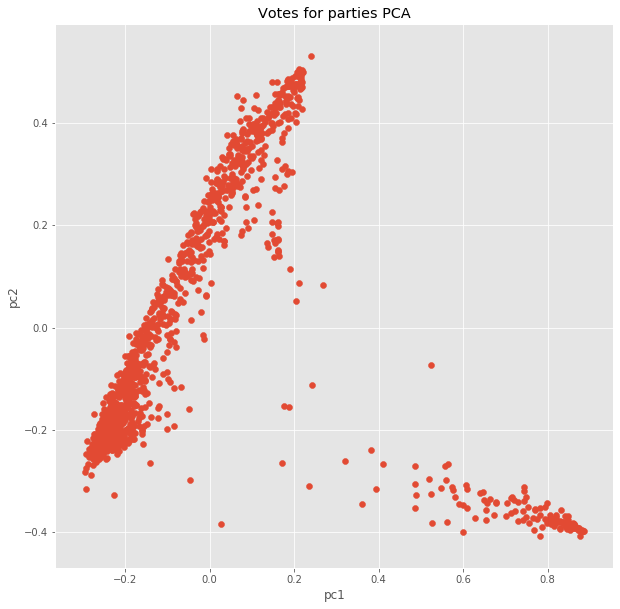

In [26]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
pca_data = pca.fit_transform(relative_votes) # 11179 (x,y) coord of all flatten points
#pca.explained_variance_ratio_ # [0.50460656 0.26116826] 
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title("Votes for parties PCA")
fig = plt.gcf()
fig.set_size_inches(10,10)


#### Finding best K

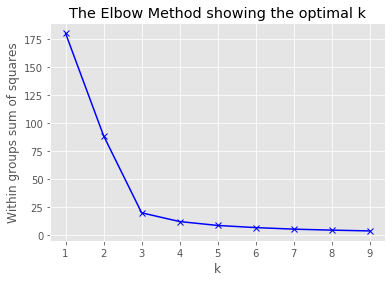

In [27]:
X = pca_data
distortions = find_K(X)
elbow_plotter(distortions)

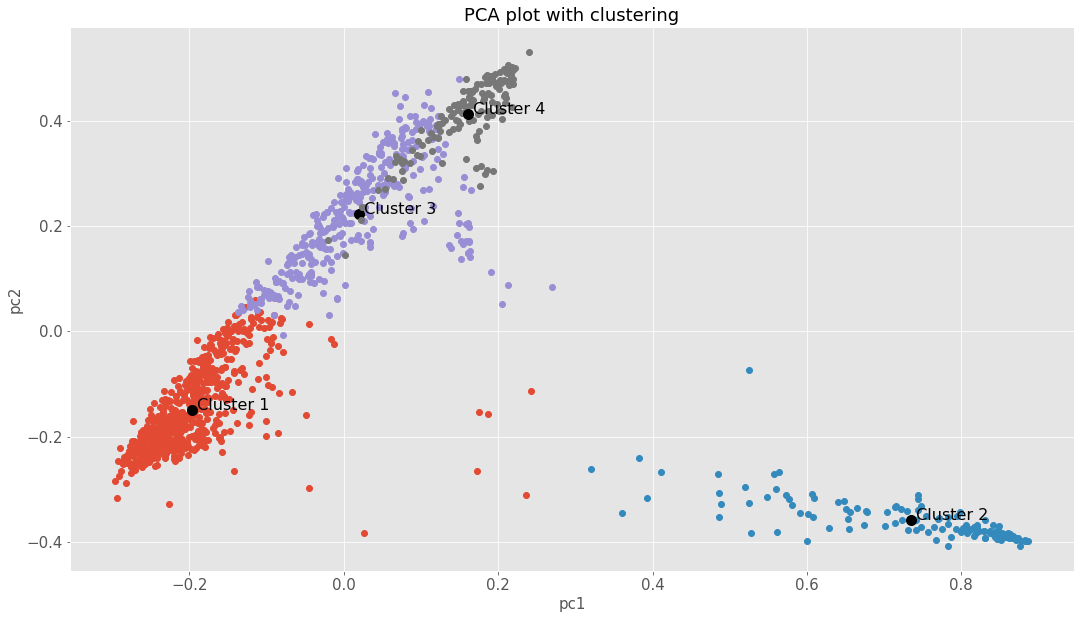

Cluster 1: פה - 0.51, מרצ - 0.13, אמת - 0.12, מחל - 0.12, ל - 0.04, Cluster 2: ודעם - 0.83, פה - 0.06, מרצ - 0.03, אמת - 0.02, מחל - 0.01, Cluster 3: מחל - 0.42, פה - 0.17, שס - 0.1, טב - 0.07, ג - 0.05, Cluster 4: טב - 0.56, מחל - 0.17, כף - 0.11, פה - 0.05, ג - 0.04, 

In [28]:
K=4; # as shown at the graph above 
kmeanModel = KMeans(n_clusters=K, max_iter=100).fit(relative_votes)
for k in range(0,K):
    # kmeanModel.labels_ -> 11179 array of 0,1,2,3 denotes relevancy of a sample to a cluster 
    # get all (x,y) value of cluster k from points in X
    plt.plot(X[kmeanModel.labels_==k,0],X[kmeanModel.labels_==k,1],'.',markersize=12) 
    #print the text on top clusters
    current_cluster_x=np.mean(X[kmeanModel.labels_==k,0])
    current_cluster_y=np.mean(X[kmeanModel.labels_==k,1])
    plt.plot(current_cluster_x,current_cluster_y,'ok',markersize=10)
    plt.text(current_cluster_x,current_cluster_y,r' Cluster '+str(k+1), fontsize=16)
plt.xlabel("pc1",fontsize=15)
plt.ylabel("pc2", fontsize=15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title('PCA plot with clustering', fontsize=18)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.show()
 
# Now that the clusters are formed, we check the meaning of the cluster centers
cluster=[1]*K
for k in range(0,K):
    # cluster_center has 29 dimensions, dimension dim corresponds to a party
    # zip each coord of cluster center with party name -> [(0.02,party1),(0.01,party2)..]
    cluster[k]=tuple(zip(kmeanModel.cluster_centers_[k],party_votes.columns)) 
    cluster[k]=sorted(cluster[k],reverse=True) # sort the tuples
    print ('Cluster '+str(k+1)+':', end=' ')
    for i in range(0,5): # get only the top 5 parties per cluster
        #cluster[k][i][1] - gets the name of party, # cluster[k][i][0] gets the cluster center
        print(cluster[k][i][1]+" - "+str(round(100*cluster[k][i][0])/100), end=', ')

***Conclusions***: , Cluster 2 is dominated by the Joint List party (ודעם), Cluster3 is dominated by the Blue White party (פה), Cluster 4 is dominated by Yamina party (טב) and Cluster 1 is dominated by Likud party (מחל). <br><br>
The clustering shows that the voting patterns of locations voting for Joint List party (ודעם) are totally different than the voting patterns of locations who vote for the rest of the parties. <br>
This corresponds with the fact that Arab towns almost exclusively vote for the Joint List party, while the jewish population voting patterns are a lot more diverse and sparse, they don't focus on one specific party.<br><br>


### Clustering 2 - Voting patterns - another prespective
Now we'll use hierarchical clustering to further examine  if votes for certain parties come from the same locations. To be more concise, only major parties would be considered.<br>

In [29]:
major_party_votes = df_location_22[major_parties[:-1].index].T
major_party_votes

,0,1,2,3,4,5,6,7,8,9,...,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213
פה,98,6,94,216,13,153,151,179,45,29,...,18163,7419,610,5467,6914,8097,4535,18294,3746,84654
מחל,128,93,57,25,158,10,78,104,25,30,...,41939,12850,5493,2153,5785,7385,8626,6954,1404,77953
ודעם,0,0,1,0,0,4,0,3,0,0,...,563,127,19,22,17,19,13,59,25,11974
שס,39,104,4,1,36,1,2,4,1,2,...,8182,1973,2111,742,699,714,909,858,118,17598
ל,11,0,10,18,1,7,18,33,3,1,...,13495,4375,202,478,769,2588,4440,1583,276,14019
ג,8,4,1,2,4,0,0,4,0,2,...,1216,171,103,628,152,237,157,126,17,11649
טב,28,11,13,17,8,2,4,14,6,57,...,4826,1229,465,679,675,574,525,978,313,24810
אמת,31,1,32,24,1,34,22,38,6,6,...,4169,1477,403,772,1142,1217,708,2592,640,13211
מרצ,13,1,5,32,0,133,8,31,9,1,...,1373,524,24,1082,608,442,180,2701,886,13861


Based on the table above, we'll build the following Dendogram:

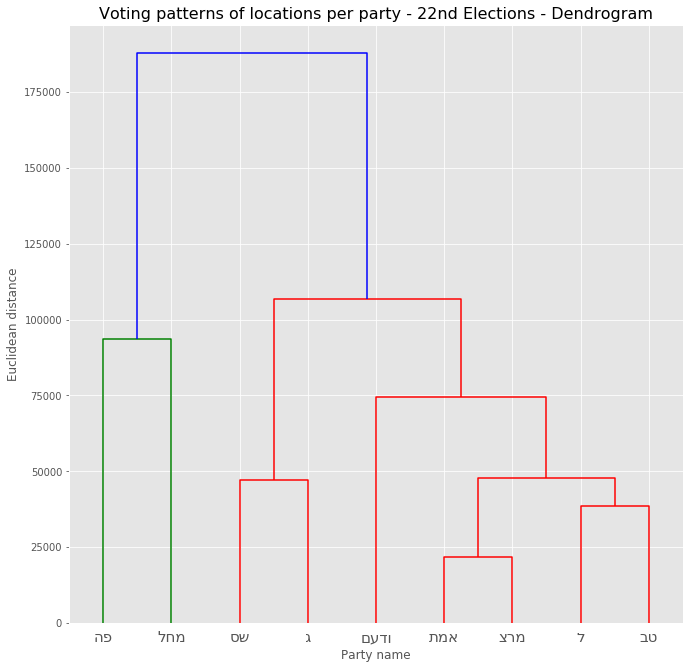

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(major_party_votes, method='complete')
fig, axis = plt.subplots(figsize=(11,11))
labels = [column_name[::-1] for column_name in major_party_votes.index] # flip hebrew characters
axis.set_title("Voting patterns of locations per party - 22nd Elections - Dendrogram", size=16)
axis.set_xlabel("Party name")
axis.set_ylabel("Euclidean distance")
dendrogram(mergings,labels=labels, leaf_rotation=0,leaf_font_size=15, ax=axis)
plt.show()

***Chosen Conclusions***:<br> 
1. Many of the locations who vote Likud ('מחל') also vote for the Blue-White party ('פה'). This makes sense, since as we've shown earlier, These two parties are the most-voted. Thus, it is very plausable that if we'll randomly pick a location, we would find voters for both parties in that same location.<br><br>
2. Voters in locations who vote Shas ('שס') also vote for Yaadot-Ha'Torah ('ג') - Not suprising, Because both parties are identified with the Jewish traditional-religious populations, who generally live together in the same city - Bnei Brak, for example.<br><br>
3. Meretz ('מרץ') & Ha'Avoda-Gesher ('אמת') who are both identified with the left side of the political map, generally have also voters who live together in the same place - the Kibutzim, for example.

### Research Question: Does education level affect voting patterns?
Apart from the given demographic dataset which came with this excercise, 'e've decided to use an extra demographical dataset from the Israeli Central Bureau of Statistics which revolves around the education rank of ~200 locations.<br>
Here is a [direct link](https://old.cbs.gov.il/publications13/1530/excel/tab01_01.xls) to the dataset, which can be found at [this page](https://old.cbs.gov.il/webpub/pub/text_page.html?publ=100&CYear=2008&CMonth=1).<br>
***Assumption:*** although the dataset is from 2008 (the latest we could found), we assume it is relevant to 2019 - the 22nd elections year)

Our goal is to detect if any interesting patterns emerge when linking education level of a population, their turnout rate & their dominated party by votes.
<br>

### Loading of education dataset
Note: The data was extracted by us into a seperate Excel file, from a larger dataset which contained a vast variety of socioeconomic metrics. For this reason, We know for certain that this file doesn't contain nulls or abnormal values.<br>


In [31]:
df_education = pd.read_csv("data\\education_ranks.csv", header=0, encoding = "ISO-8859-8")
df_education

,סמל ישוב,שם ישוב,דירוג לפי ממוצע שנות לימוד של בני 54-25,ערך שנות לימוד,דירוג לפי אחוז בעלי תואר אקדמי מבני 54-25,ערך בעלי תואר
0,472,אבו גוש,41,11.2,16,8.0
1,473,אבו סנאן,64,11.8,87,17.9
2,182,אבן יהודה,221,15.1,228,51.0
3,2710,אום אל-פחם,19,10.6,22,8.7
4,31,אופקים,84,12.5,38,11.2
...,...,...,...,...,...,...
191,692,שפיר,132,13.5,155,30.6
192,8800,שפרעם,40,11.2,67,14.9
193,5000,תל אביב -יפו,212,14.9,220,48.7
194,154,תל מונד,231,15.4,243,63.3


***Data description:<br>***
Each row represents a location. The features are:
1. Location symbol - unique code matched to each location.
2. Location name.
3. rank of a location based on the average school years of its population.
4. The actual average school years of a population of ages 25-54.
5. rank of a location based on the rate of academics in that same location.
6. The actual percent of academics within ages of 25-53 within the location.

Next, via the data above, we calculate the "education score" - a score which is an average between two ranks:
1.  rank of a location based on the average school years of its population (column 2)
2. rank of a location based on the rate of academics in that same location (column 5)

In [32]:
rank_school_years = df_education.columns[2]
rank_academics_rate = df_education.columns[5]
df_education["education_score"] = (df_education[[df_education.columns[2], 
                                                df_education.columns[5]]].mean(axis=1)).astype(int)
df_education = df_education[["education_score",LOCATION_SYMBOL]]
print("The table shows an education score for each location: ")
df_education

The table shows an education score for each location: 


,education_score,סמל ישוב
0,24,472
1,40,473
2,136,182
3,13,2710
4,47,31
...,...,...
191,81,692
192,27,8800
193,130,5000
194,147,154


### Scatter & Correlation Matrix
Before using any clustering techniques to detect educational related patterns, we first create the  Scatter & Correlation matrices, which help to identify trends between features. Who knows, maybe something interesting will come up :-) <br>Apart from the education score of a location, we also add a turnout column and a column which represents the dominating party at each specific location, in hopes of gaining more insight into the data.

In [33]:
df_turnout = df_location_22.copy() # we perform a copy inorder to keep the df_location_22 dataset intact
df_turnout['turnout'] = df_turnout[ACTUAL_VOTERS] / df_turnout[ELIGIBLE_VOTERS]

# Create column which represents the party who got most votes
df_party_votes = df_turnout[df_turnout.columns[7:39]]
df_turnout["max_party"] = df_party_votes.idxmax(axis=1) 
df_turnout


,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,צ,צן,ץ,ק,קך,קץ,רק,שס,turnout,max_party
0,17,שחר,7,517,377,0,377,31,8,0,...,0,0,0,0,0,0,0,39,0.729207,מחל
1,2,תירוש,10,332,245,0,245,1,4,0,...,0,0,0,0,0,0,0,104,0.737952,שס
2,17,"ניר ח""ן",11,406,287,0,287,32,1,1,...,0,0,0,0,0,0,0,4,0.706897,פה
3,18,חצבה,13,502,373,0,373,24,2,0,...,0,0,0,2,0,0,0,1,0.743028,פה
4,17,נועם,15,308,228,1,227,1,4,0,...,0,0,0,0,0,0,0,36,0.740260,מחל
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,8,קרית ביאליק,9500,34213,21729,133,21596,1217,237,19,...,11,3,3,11,4,5,12,714,0.635109,פה
1210,8,קרית ים,9600,36529,20697,203,20494,708,157,13,...,25,8,4,18,3,7,10,909,0.566591,מחל
1211,19,הוד השרון,9700,45835,34603,98,34505,2592,126,59,...,7,0,6,3,4,0,7,858,0.754947,פה
1212,9,בנימינה-גבעת עדה,9800,10142,7536,21,7515,640,17,25,...,6,0,1,0,0,0,2,118,0.743049,פה


Note: max_party column contains the name of the party who got the most votes in each location

### Scatter matrix
Note that we dropped all non-essential data like minor parties, and columns which have no meaning to us like the committee symbol of a ballot. This is done to maximize the viewability of the matrix.

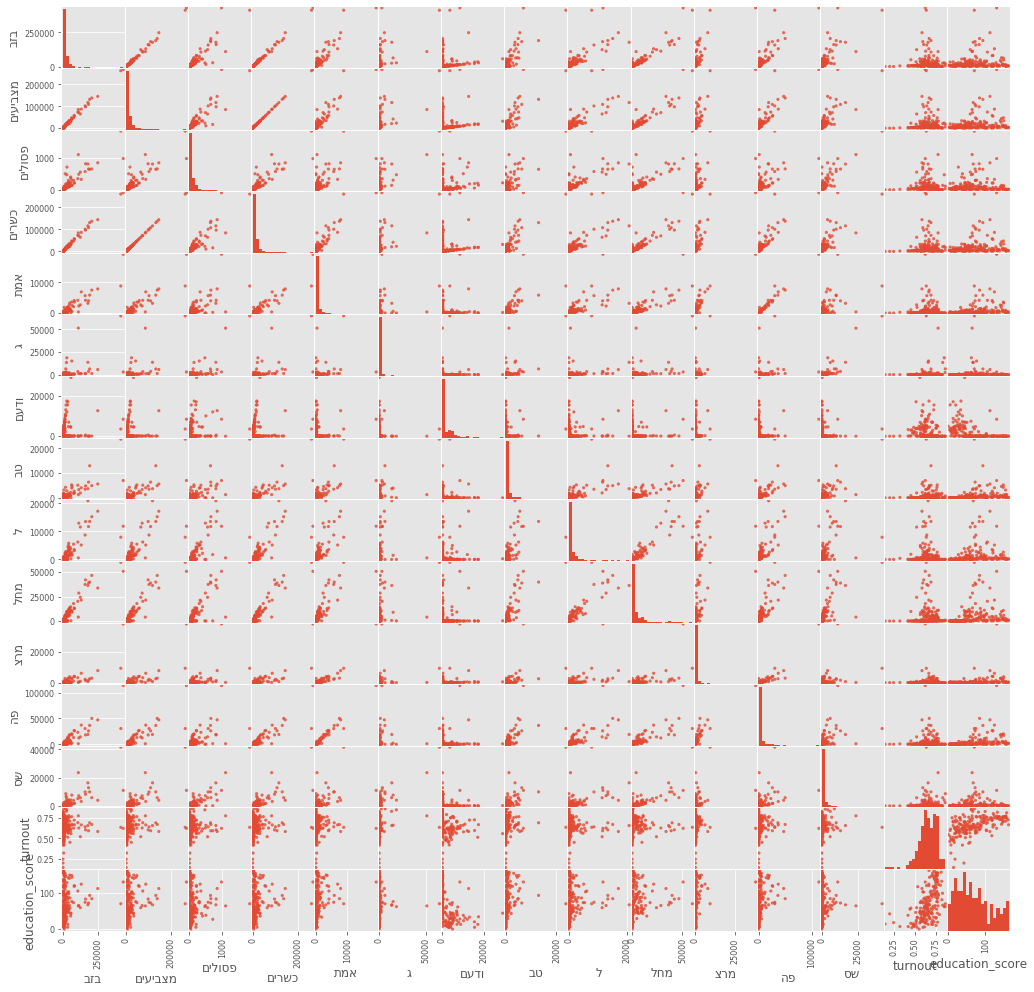

In [34]:
df_scatter = pd.merge(df_turnout,df_education,how="inner",on=LOCATION_SYMBOL) 
df_scatter = df_scatter.drop(columns=[LOCATION, COMMITTEE_SYMBOL, LOCATION_SYMBOL, *minor_parties.index])

# Flipping characters of hebrew features
hebrew_features = list([name[::-1] for name in df_scatter.columns[:-3]])
english_features = list(df_scatter.columns[-3:])
df_scatter.columns = hebrew_features+english_features

pd.plotting.scatter_matrix(df_scatter, marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)
fig = plt.gcf()
fig.set_size_inches(17,17)

***Conclusions***:
1. There is a linear correlation between actual voters and eligble voters, which makes total sense, since all the actual voters are also eligble voters(row1 column2).
2. between education score and turnout (bottom row, 2nd column from the right), it is noticable that education score has an affect on the turnout of a location. Our first impression is that the higher the education level of location is, the higher its turnout.<br> ***This is worth a deeper look.***
3. There is a distinguishable left skew between the education score and locations who vote for the Joint list ('ודעם') party (7th row, last column). This apparently means that the voters of this party have a low education score.
4. The opposite can be said about the education score of locations who vote for the the Blue-White party ('פה') (4th row from bottom, last column), and the Yamina ('טב') party (8th row, last column) - These locations are skewed to the right, meaning they have higher level of education.<br>
***The connection between education level of a location and their dominating party requires further examination.***

### Correlation Matrix

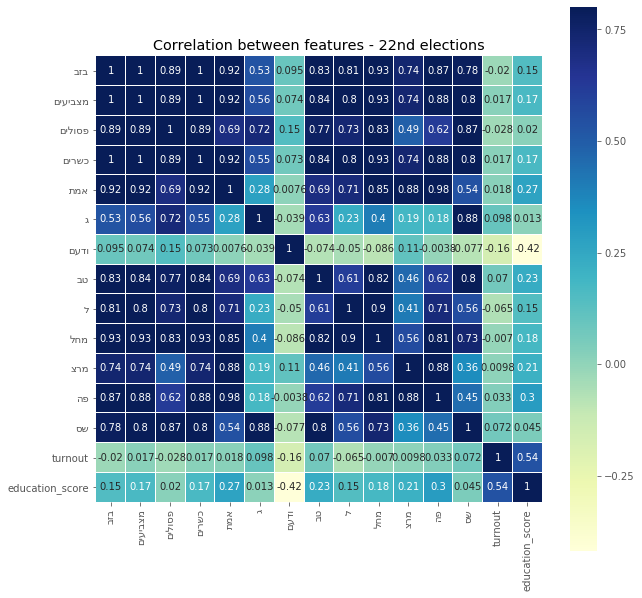

In [35]:
corr=df_scatter.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features - 22nd elections');

***Conclusions***: <br>
Now that we view the data in a numerical fashion, the patterns start to be more clear:
1. We see almost a clear cut between the education score of voters who vote for the Joint list ('ודעם')(score: -0.42, last column) and the voters of the Blue-white party (score: 0.3, last column)
2. Between education score and turnout (last column, 2nd row from bottom), The corrleation matrix shows that there is a positive correlation between these two features.<br>

Lets take a closer a look at both of these conclusions. We'll start the conclusion 1.

### Clustering 3 - Education vs Turnout
Due to our findings from the scatter and correlation matrix,
In the next part, We'll use KMeans to further analyze patterns between Education & Turnout.

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_turnout["max_party"] = le.fit_transform(df_turnout["max_party"])

df_eduvotes = pd.merge(df_education,df_turnout,how="inner",on=LOCATION_SYMBOL) 
df_eduvotes = df_eduvotes[['turnout','education_score','max_party']]
X = df_eduvotes[['turnout','education_score']]
X

,turnout,education_score
0,0.516597,24
1,0.607591,40
2,0.758328,136
3,0.513345,13
4,0.664830,47
...,...,...
191,0.817505,81
192,0.592187,27
193,0.621386,130
194,0.757167,147


Based on the table above we will find patterns between turnout and education score with the KMeans technique.

#### Finding best K

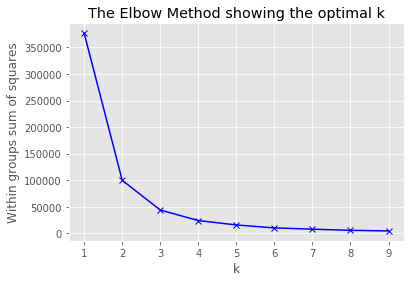

In [37]:
X = X.values
distortions = find_K(X)
elbow_plotter(distortions)

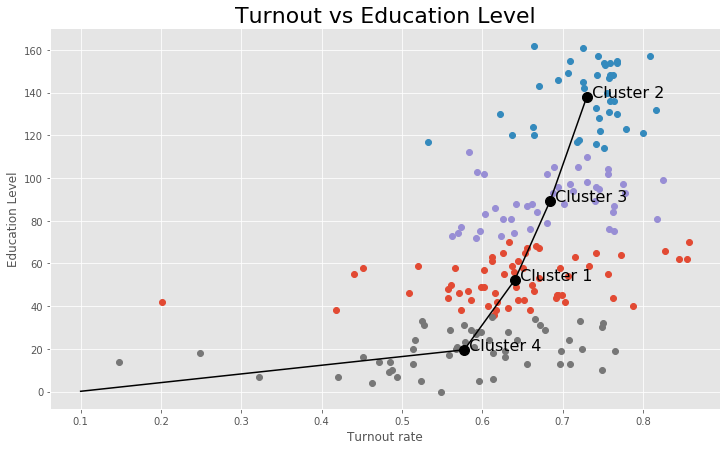

In [38]:
from scipy.optimize import curve_fit
K=4; 
kmeanModel = KMeans(n_clusters=K, max_iter=100).fit(X)
for k in range(0,K):
    # kmeanModel.labels_ -> 11179 array of 0,1,2,3 denotes relevancy of a sample to a cluster 
    # get all (x,y) value of cluster k from points in X
    plt.plot(X[kmeanModel.labels_==k,0],X[kmeanModel.labels_==k,1],'.',markersize=12) 
    #print the text on top clusters
    current_cluster_x=np.mean(X[kmeanModel.labels_==k,0])
    current_cluster_y=np.mean(X[kmeanModel.labels_==k,1])
    plt.plot(current_cluster_x,current_cluster_y,'ok',markersize=10)
    plt.text(current_cluster_x,current_cluster_y,r' Cluster '+str(k+1), fontsize=16)
plt.xlabel("Turnout rate")
plt.ylabel("Education Level")
plt.title('Turnout vs Education Level', fontsize=22)

x = [x for x,y in kmeanModel.cluster_centers_]
x.sort()
y = [y for x,y in kmeanModel.cluster_centers_]
y.sort()
plt.plot([0.1,*x],[0.1,*y],color='black')

fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()


Note: the dots in the graph represent locations. <br>
***Conclusion***: The data shows the there is an interseting positive correlation between turnout percent and education level:<br>
1. First of all, The good news is that at least in Israel, We can safely say that almost all locations enjoy a minimum turnout rate of 0.5, without any regards to their level of education. In other words, in the majority of places, at least 50% of people go out to vote, no matter how educated they are. Notably, there are some minor exceptions:  If we inspect the leftmost side of the graph we see 4 locations with low level of education (0-40) who have a very low turnout (0-0.3).<br><br>

2. That being said, its visible that locations with extremly high level of education, as seen in cluster 2 for example (education score: 120-160) have also high turnout rate of ~0.78 (78% of its population cast a vote in the ballot).<br><br>

To sum-up, from a turnout rate of 0.5, We can deduce that the more educated a population is, the bigger their turnouts will be. We plotted an extra line to emphasis this trend.<br><br>
This goes in hand in hand with the following quote from the [this article](https://www.idi.org.il/parliaments/8618/8908) from the "Israeli Institute for Democracy":
![educationturnout](educationturnout.jpg)
The article states that more educated a person is, the more likely of him to vote. As shown, this corresponds with our findings.

### Clustering 4 - Education level and dominating party
After seeing that there is an association between votes to a party and the education level of the voters, 
In this section we'll dive deeper into the relationship between a population's education level and their most voted party.

In [39]:
X= df_eduvotes[['education_score','max_party']]
X

,education_score,max_party
0,24,2
1,40,2
2,136,10
3,13,2
4,47,7
...,...,...
191,81,7
192,27,2
193,130,10
194,147,10


#### Finding best K

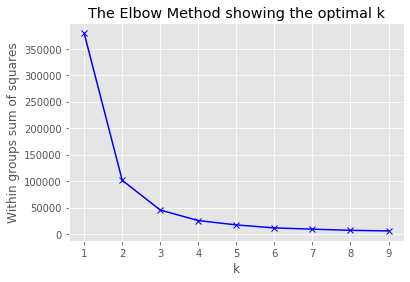

In [40]:
X= X.values
distortions = find_K(X)
elbow_plotter(distortions)

Text(0.5, 1.0, 'Education Level vs Dominated Party')

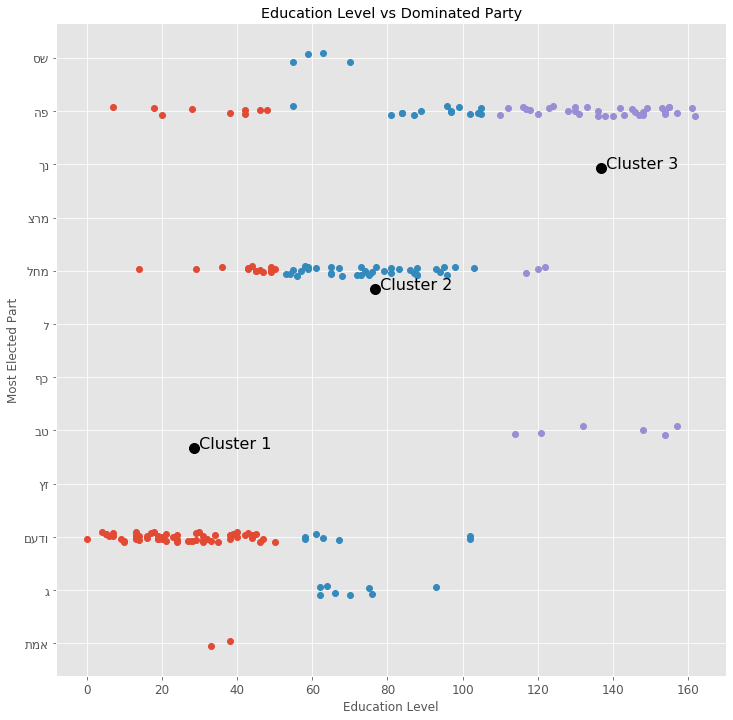

In [41]:
from matplotlib.ticker import FixedLocator, FixedFormatter

K=3; 
kmeanModel = KMeans(n_clusters=K, max_iter=100).fit(X)

fig,ax = plt.subplots(figsize=(12,12))
for k in range(0,K):
    # kmeanModel.labels_ -> 11179 array of 0,1,2,3 denotes relevancy of a sample to a cluster 
    # get all (x,y) value of cluster k from points in X
    y_jitter =  np.random.uniform(-0.1,0.1,len(X[kmeanModel.labels_==k,1]))
    ax.plot(X[kmeanModel.labels_==k,0],X[kmeanModel.labels_==k,1]+y_jitter,'.',markersize=12) 
    # print the text on top clusters
    current_cluster_x=np.mean(X[kmeanModel.labels_==k,0])
    current_cluster_y=np.mean(X[kmeanModel.labels_==k,1])
    ax.plot(current_cluster_x,current_cluster_y,'ok',markersize=10)
    ax.text(current_cluster_x,current_cluster_y,r' Cluster '+str(k+1), fontsize=16);
labels = [name[::-1] for name in le.classes_]
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.yaxis.set_major_locator(FixedLocator(np.arange(len(labels))))
ax.yaxis.set_major_formatter(FixedFormatter(labels))

ax.set_xlabel("Education Level")
ax.set_ylabel("Most Elected Part")
ax.set_title("Education Level vs Dominated Party")

Note: The dots represent locations in Israel. Since the y-values are discrete, We've added a small amount of jitter on the y-axis to the points. This was done To prevent the points from overlapping,  allowing us to get a more clear picture of the cluster's density.<br><br>
***Conclusion***: Kmeans divides the graph (and the Israeli population...) into 3 main parts:<br>
1. The left part - The lowest education level ranging between ~0-50. This represents locations with approximately 3-10 years of schooling per capita and 3%-15% rate of academics. Locations in this cluster mainly votes for the Joint List party (ודעם), although there is a considerable flow of votes in this education range towards the Blue White party (פה).<br><br>
2. The medium part - The medium education level ranging between ~60-100. This represents locations with approximately 11-13 years of schooling per capita and ~16%-35% rate of academics. The dominant party in this cluster is the Likud party (מחל). In this cluster, there is also a flow of votes towards Yaadot Ha'Torah (ג), and Shas (שס).<br><br>
3. The right part - The highest education level ranging between ~120-180. This represents locations with approximately 12-16 years of schooling per capita and 40%-70% of academics. This cluster mainly votes for the Blue White party (פה). There is a very small flow towards Likud (מחל) and slightly bigger towards Yamina (טב).

## Question 4 - Predicting valid votes
***Important:*** For Questions 4-6 we've contemplated a lot on which data to use for training & testing. First, we knew that the best way to predict any voting patterns is to rely on the given demographic data. This type of data is unique per sample, and is logically comparable between locations, and can potentially reveal specific voting habits.<br><br>

The best case scenario for us would have been if we had the 2019 demographic data which would be trained with the 22nd elections data (also occured in 2019). After that, to predict voting patterns of the 23rd elections (which occured in 2020) we could've used the corresponding 2020 demographic data (if it existed) and use this data on the model which was trained on the last year's election (2019). It's important to note that in this scenario, the demographic data itself should optimally be "dyanmic", meaning it needs to contain data which changes from a year to year basis, for example: average income, employment rate, etc.<br><br>

Due to the fact that we've recieved only one demographic data set from 2018, which is mostly static (contains features which doesn't change on a yearly basis), We concluded that the best course of action is to ***assume*** that this dataset is relevant to the 23rd election dataset (2020) in terms of demographical correctness, then merge these two datasets together, train 80% of it, and try to predict the rest of the 20%. These 20% will contain the samples that are requested to be predicted in the questions.<br><br>

For this to be a ***valid scenario in reality*** in a specific time frame, we have created the following scenario:<br>we're playing an official ML team in the Central Election Committee during the voting day of the 23rd elections. It's about 19:00 o'clock and we've just got 80% of the data. At this point, the board of management asks us to make quick predictions on the 20% of the data which haven't arrived yet, based on the 80% of data which did arrive.

Technicaly, this means we've split the 23rd elections location dataset into 80% training (first 972 rows) and 20% testing (bottom 240 rows). Every sample which needs to be predicted, is moved to the testing set.

To conclude, since we decided to make predictions based on demography, and we only have a single static demographical dataset, we decided to work in a scope of a single election - the 23rd. <br><br>

### Prepairing the data to predict valid votes

In [42]:
# load votes_23_location dataset
df_locations_23 = pd.read_csv("data\\votes_23_locations.csv", encoding="ISO-8859-8")
df_valid_23 = df_locations_23[[LOCATION, LOCATION_SYMBOL, VALID_VOTES]]
# merge votes_23_location and df_demographics 
df_merged = pd.merge(df_valid_23, df_demographics, how='inner', on=LOCATION_SYMBOL)
# move target column to last
target_column=df_merged.pop(VALID_VOTES)
df_merged["valid_votes"] = target_column

Here we move haifa, Saknin, Eylat & Ayelet Haschar to the end of the data frame. According to our time frame, this is the data which haven't arrived yet, and is needed to predicted.


In [43]:
#  move haifa, Saknin, eylat & ayelet haschar to the end of the data frame
df_temp = df_merged.loc[df_merged[LOCATION_SYMBOL].isin([4000,77,2600,7500,4100])]
df_merged = df_merged.drop(index = df_temp.index)
df_merged = df_merged.append(df_temp, ignore_index=True)
df_merged = df_merged.drop([LOCATION_SYMBOL],axis=1)

df_merged = df_merged.set_index(LOCATION)
df_merged 

,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,יהודים ואחרים,מזה: יהודים,ערבים,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,גובה,ועדת תכנון,אשכול רשויות מקומיות,valid_votes
שם ישוב,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211,589
אבו גוש,1,11,111,99,444,2,7543,97,79,7446,1948,280,1,598,152,211,2682
אבו סנאן,2,24,245,99,143,2,13915,28,11,13887,1948,270,1,19,252,211,6037
אבו עבדון שבט,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211,40
אבו קורינאת שבט,6,62,623,99,143,3,7306,5967,5735,3339,1948,460,1,167,699,211,1328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
איילת השחר,2,21,211,1,143,1,1134,1134,1082,3339,1918,330,15,143,253,211,585
אילת,6,62,625,0,143,1,51935,49675,41906,2260,1951,150,1,-5,602,211,22636
חיפה,3,31,311,0,210,4,283640,250943,217360,32697,0,130,1,-17,304,211,144625


#### Train test split

In [44]:
X_train = df_merged.iloc[0:972,:-1]
y_train = df_merged.iloc[0:972,-1]
X_test = df_merged.iloc[972:,:-1]
y_test =df_merged.iloc[972:,-1]

The following function will help us to determine how much each feature contributes to the accuracy of the predictions.

In [45]:
def feature_importance(X_train, y_train):
    from sklearn.ensemble import ExtraTreesRegressor
    # Build a forest and compute the impurity-based feature importances
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)

    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],  axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importance")
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlabel("Column index of feature")
    plt.ylabel("Contribution to accuracy")
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

The following function trains a random forest regressor, and returns the best optimized model. Since we use this block of code more than once, it is saved here as a function to keep the code short & maintainable.

***Note***: We were asked the explain why we used a certain accuracy metric (gini, mse, entropy...). In this case, the GridSearch function makes this decision for us (mse or mae).

In [46]:
def random_forest(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error

    # Hyperparameter grid
    param_grid = { 
                "n_estimators"  : [100,250],
                "criterion":["mse", "mae"],
                "max_features"  : [ "auto", "sqrt"],
                'max_depth': [None, 30],  # The maximum depth of the tree.
                "min_samples_split" : [2,4],
                "bootstrap": [True]
                }

    estimator = RandomForestRegressor(random_state = RSEED)
    gs = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1)
    gs.fit(X_train,y_train)
    best_estimator = gs.best_estimator_
    return best_estimator

#### Feature importance
Lets check the contribution of each feature to the accuracy of the prediction

Feature ranking:
1. feature 7 (0.308955)
2. feature 6 (0.277376)
3. feature 8 (0.273506)
4. feature 11 (0.041768)
5. feature 9 (0.039366)
6. feature 5 (0.014082)
7. feature 10 (0.012079)
8. feature 13 (0.009801)
9. feature 14 (0.005906)
10. feature 0 (0.004989)
11. feature 1 (0.004820)
12. feature 3 (0.003629)
13. feature 2 (0.002181)
14. feature 4 (0.001187)
15. feature 15 (0.000355)
16. feature 12 (0.000002)


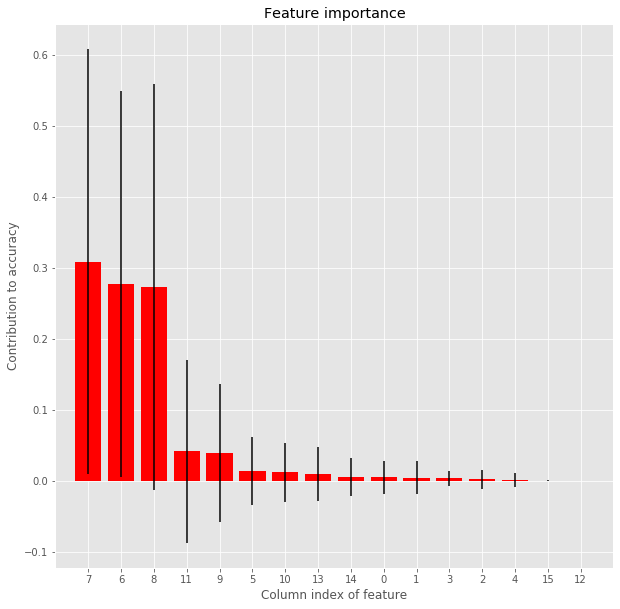

In [47]:
feature_importance(X_train,y_train)

#### Checking accuracy of the dataset with only the most important features

In [ ]:
best_features = [7,6,8,11,9,5]
X_train_trim = X_train[X_train.columns[best_features]]
X_test_trim = X_test[X_test.columns[best_features]]
best_estimator = random_forest(X_train_trim, y_train, X_test_trim, y_test)
best_estimator.score(X_test_trim,y_test)

#### Checking accuracy of the dataset with all features

In [ ]:
best_estimator = random_forest(X_train, y_train, X_test, y_test)
best_estimator.score(X_test,y_test)

***Conclusion***: The estimator which was trained with the whole data set, has performed better than the estimator which was trained with trimmed data set containing only the best features. Therefore, we'll choose the first (Whole-dataset-trained estimator).

#### Training the random forest
In order to be consice, we only present the results and predictions of models which went through the optimization process.

#### Presenting the predictions 

##### Table Form

In [ ]:
y_pred = best_estimator.predict(X_test)
predictions = y_pred.astype(np.int) 
# we slice the last 5 items since we've moved the 5 cities to the end of the dataframe
df_results = pd.DataFrame({"valid_votes":y_test[-5:], "predictions":predictions[-5:]})
df_results

##### Graph Form

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
ind = np.arange(df_results.shape[0])
width = 0.35
space = 0.17
ax.bar(ind-space, df_results["valid_votes"],width)
ax.bar(ind+space, df_results["predictions"],width)
labels = [name[::-1] for name in df_results.index] #reverse Hebrew labels
ax.set_xticklabels(['',*labels])

for index, value in enumerate(df_results["predictions"]):
    ax.text(x=index, y=value, s=f"{value:,}", color='black', fontweight='bold');
for index, value in enumerate(df_results["valid_votes"]):
    ax.text(x=index-0.4, y=value, s=f"{value:,}", color='black', fontweight='bold');
    
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend(["real outcome", "predictions"])    
ax.set_xlabel("Locations")
ax.set_ylabel("Total valid votes")
ax.set_title("Valid votes predictions using Random Forest - 22nd Elections")
plt.show()

***Conclusion***: The performance of random forest is quite impressive, missing some predictions (Ayelet Hashachar only by ***6*** votes).

## Question 5 - Predicting amount of voters per party
Seeing that this question asks us to make multiple predictions per each city, we've split the job into functions, and use a loop to traverse each location and call the functions when necessary. This was done mainly to save code, and be more efficient.

In-depth technical info: for each party (Likud, Joint List, Blue White) we first prepare the data - This done by transforming the iterated party into a target column (since we need to predict its votes). Afterwards, the locations who we need to predict are moved to the bottom of the dataframe. This is done Than we perform the predicitons - in which we perform an "80-20" split (the 20% are the testing set which include the locations who were previously moved to the bottom), and then Adaboost performs the predictions with the model was trained on the 80%. In total, Adaboost runs 3 times, one time per party. The results are then concatenated into a single table.

In [ ]:
def predict (df):
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.model_selection import GridSearchCV
    X_train = df.iloc[0:972,:-1]
    y_train = df.iloc[0:972,-1]
    X_test = df.iloc[972:,:-1]
    y_test = df.iloc[972:,-1]
    adb = AdaBoostRegressor(random_state = RSEED)
    adb_param_grid = {'n_estimators':[50,100,150,200], #Number of weak learners to train iteratively., 
                      'learning_rate':[0.001, 0.01, 0.1, 1], #It contributes to the weights of weak learners. It uses 1 as a default value.,
                      'random_state': [1]}
    gsADB = GridSearchCV(adb,param_grid = adb_param_grid, cv=5, n_jobs=-1)
    gsADB.fit(X_train,y_train)
    ADB_best = gsADB.best_estimator_
    y_pred=ADB_best.predict(X_test)
    print(f"Adaboost Score: {ADB_best.score(X_test,y_test)}")
    return y_pred

In [ ]:
def prepare_data(party):
    df_party_votes = df_locations_23[[LOCATION, LOCATION_SYMBOL, party]]
    df_merged = pd.merge(df_party_votes, df_demographics, how='inner', on=LOCATION_SYMBOL)
    
    # move target column to last
    target_column=df_merged.pop(party)
    df_merged[party] = target_column
    
    #  move jeruslam, bnei_brak, karmiel & dalet_elkarmel (by their location_symbol)
    # to the end of the data frame
    df_temp = df_merged.loc[df_merged[LOCATION_SYMBOL].isin([3000,6100,7500,1139,494])]
    df_merged = df_merged.drop(index = df_temp.index)
    df_merged = df_merged.append(df_temp, ignore_index=True)
    df_merged = df_merged.drop([LOCATION_SYMBOL],axis=1)
    df_merged = df_merged.set_index(LOCATION)

    return df_merged

In [ ]:
df_results = pd.DataFrame({"location":[],"party":[], "actual_votes":[],"predictions":[]})
for party in [LIKUD, JOINT_LIST, BLUE_WHITE]:
    data = prepare_data(party)
    predictions = predict(data)
    # we slice the last 5 items since we've moved the 5 cities to the end of the dataframe
    current_party_votes = pd.DataFrame({"location":data.index[-5:], "party":party ,
                         "actual_votes":data[party].iloc[-5:], "predictions":predictions[-5:]})
    df_results = pd.concat([current_party_votes, df_results],ignore_index = True)
    
df_results.set_index(["location","party"],inplace = True)
df_results.sort_index(inplace=True)
df_results    

##### Graph Form

In [ ]:
def plotter(ax, parties ,location, predictions, real_outcome):
    ind = np.arange(len(parties))
    width = 0.35
    space = 0.17
    ax.bar(ind-space, real_outcome,width)
    ax.bar(ind+space, predictions,width)
    
    labels = [name[::-1] for name in parties]  #reverse Hebrew labels
    for index, value in enumerate(predictions):
        ax.text(x=index, y=value, s=f"{value:,}", color='black', fontweight='bold')
    for index, value in enumerate(real_outcome):
        ax.text(x=index-0.35, y=value, s=f"{value:,}", color='black', fontweight='bold')
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.xaxis.set_major_locator(FixedLocator(ind))
    ax.xaxis.set_major_formatter(FixedFormatter(labels))
    ax.legend(["real outcome","predictions"])    
    ax.set_ylabel("Total valid votes")
    ax.set_title(location[::-1]) #flip Hebrew location name

In [ ]:
from collections import OrderedDict
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
subplots = [ax1, ax2, ax3, ax4, ax5]
ax6.set_xticks([])
ax6.set_yticks([])

locations = [location for location, party in df_results.index[0:]]
locations = list(OrderedDict.fromkeys(locations)) # removes duplicates
parties = [party for location, party in df_results.index[0:]]
parties = list(OrderedDict.fromkeys(parties)) # removes duplicates

real_outcome = np.round(list(df_results["actual_votes"]))
predictions = np.round(list(df_results["predictions"]))

for i in range(len(locations)):
    location = locations[i]
    plotter(subplots[i], parties, location, predictions[i*3:(i*3)+3], real_outcome[i*3:(i*3)+3])
    
title = ("Amount of voters per party in 5 cities using Adaboost - 22nd Elections")
fig.subplots_adjust(top=0.94)
fig.suptitle(title,size=16)
plt.show()
    


***Conclusion***: The performance of adaboost is quite dissapointing. In some locations the results were somewhat acceptable, but mostly the predictions are off.

## Question 6 - Deciding where to send observers by prediction
We we're asked to explain which algorithm we chose for this task and why.<br>
The chosen algorithm: Random Forest Regressor.<br>
Why? Because it performed very well in question 4 which asked to predict valid votes. Since the demand in this question is very similar, it makes perfect sense to use the same algorithm again.

### Preparing the data inorder to predict total spoiled votes per location

In [ ]:
# load votes_23_location dataset
df_spoiled_23 = df_locations_23[[LOCATION, LOCATION_SYMBOL, SPOILED_VOTES]]

# merge votes_23_location and df_demographics 
df_merged = pd.merge(df_spoiled_23, df_demographics, how='inner', on=LOCATION_SYMBOL)

# move target column to last
target_column=df_merged.pop(SPOILED_VOTES)
df_merged["spoiled_votes"] = target_column

df_merged = df_merged.set_index(LOCATION)
df_merged


#### Train test split

In [ ]:
X_train = df_merged.iloc[0:972,:-1]
y_train = df_merged.iloc[0:972,-1]
X_test = df_merged.iloc[972:,:-1]
y_test = df_merged.iloc[972:,-1]

#### Feature importance
Lets check the contribution of each feature to the accuracy of the prediction

In [ ]:
feature_importance(X_train,y_train)

#### Checking accuracy of the dataset with only the most important features

In [ ]:
best_features = [8,7,9,10,12,14]
X_train_trim = X_train[X_train.columns[best_features]]
X_test_trim = X_test[X_test.columns[best_features]]
best_estimator = random_forest(X_train_trim, y_train, X_test_trim, y_test)
best_estimator.score(X_test_trim,y_test)

#### Checking accuracy of the dataset with all features

In [ ]:
best_estimator = random_forest(X_train, y_train, X_test, y_test)
best_estimator.score(X_test,y_test)

***Conclusion***: The estimator which was trained with the whole data set, has performed better than the estimator who was trained with trimmed data set containing only the best features. Therefore, we'll choose the first (Whole-dataset estimator).

#### Our rational for solving the task:
As described before, we're playing the followig scenario: we're an official Central Election Committee ML Team during the 23rd elections, it's 19:00 o'clock and the results from the predicted cities haven't arrived yet. We are giving the task to predict the amount of spoiled votes in those cities (based on the spoiled votes which already arrived), In order to help to Committe to decide where to send more observers for backup.<br><br>
Since a bigger population generally requires more observers per ballot, we must consider not only the amount of potential spoiled votes, but also the population size of the location.<br><br>
For that reason we have devised the following metric: The amount of spoiled votes of a location divided by the population size of that same location - This score was calculated per location - One time scoring the real outcome, and the second time scoring with our predicted amount of spoiled votes.<br><br>

As a final step, A threshold was set-up (we assume that it was given to us by the Elections Committee. In reality this is an arbitrary number based on the results we got): The locations who scored more than 20 - We're recommended by us as those who need observers backup ASAP to prevent potential spoiled votes. 

In [ ]:
y_pred = best_estimator.predict(X_test)
predictions = np.round(y_pred, decimals=2)
df_results = pd.DataFrame({"spoiled_votes":y_test,
                           "predictions":predictions, "population_size": X_test[POPULATION_SIZE]})
df_results["predicted_per_population"] = df_results["predictions"]/df_results["population_size"]
df_results["predicted_per_population"]*=10000 # These numbers are small so we increase them
df_results["outcome_per_population"] = df_results["spoiled_votes"]/df_results["population_size"]
df_results["outcome_per_population"]*=10000 # These numbers are small so we increase them

observer_threshold = 20 
df_results["observers_by_outcome"] = df_results["outcome_per_population"]>observer_threshold
df_results["observers_by_prediction"] = df_results["predicted_per_population"]>observer_threshold
df_results = df_results.sort_values(by="predictions", ignore_index=False, ascending=False)

df_results

***Data description:***
1. spoiled_votes -  the real outcome of spoiled votes.
2. predictions - the predicted amount of spoiled votes.
3. population_size - the population size in the location.
4. predicted_per_population = predictions divided by population_size.
5. predicted_per_population = spoiled_votes divided by population_size.
6. observers_by_outcome - the locations who got observers sent to them based on the real outcome.
7. observers_by_prediction - the locations who got observers sent to them based on our predictions.

#### Presenting the predictions with a confusion matrix
Via the 2 last columns in the table above we construct the following confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
outcome = df_results["observers_by_outcome"]
prediction = df_results["observers_by_prediction"]
conf_matrix = confusion_matrix(outcome, prediction)
plot_confusion_matrix(conf_matrix, classes = ["""Don't Send Observers""", 'Send Obeservers'],
                      title = 'Spoiled Votes Confusion Matrix')

***Conclusions***:
1. True Positive: We recommended to send observers to 38 locations, which turned out be correct.
2. False Positive: We incorrectly advised to send observers to 37 locations, when in fact it wasn't necessary.
3. False Negative: We mistakenly recommended not to send observers to 52 locations, where they were indeed actually needed to be sent to.
4. True Negative: We correctly predicted that 113 locations don't need more observers.